In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas
%matplotlib inline
import numpy as np
import time


In [11]:
df = pandas.read_csv('DATA/GT_10_STORIES/single_candid.csv', dtype={'candidates': 'S10'})

In [14]:
#sanity data checks-- make sure you didn't lose any.
print len(df) # idk why i gained some tweets...
print len(set(df.author)) # 6,567

24470
6572


## Top Tweeted Stories

In [40]:
df.title.value_counts()[:10]

The One Weird Trait That Predicts Whether You’re a Trump Supporter                 364
Donald Trump Is Shocking, Vulgar and Right                                         313
Why I'm voting for Trump                                                           143
Rubio: Law-abiding undocumented immigrants could stay                              138
Anne Frank's stepsister compares Donald Trump to Adolf Hitler                      111
Biden praises Sanders on income inequality                                         110
On January 20, 2017 Bernie Sanders Will Be Sworn In as America's 45th President    109
Poll: Trump dominates GOP field                                                    108
Bernie Sanders Is a Once in a Lifetime Presidential Candidate. The Time Is Now.    105
TODD STARNES School caught trying to get students to work for Hillary              105
Name: title, dtype: int64

In [58]:
top10 = list(df.title.value_counts().index[:10])

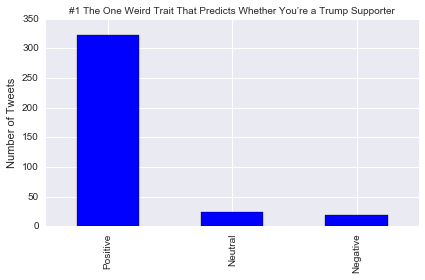

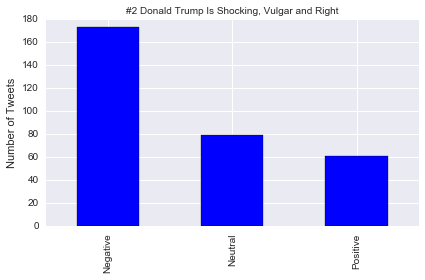

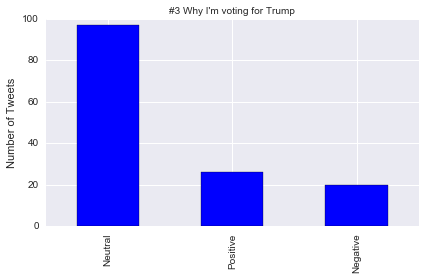

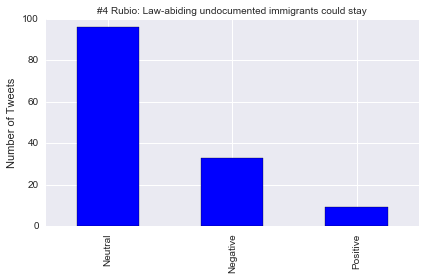

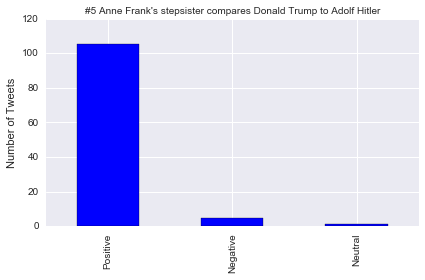

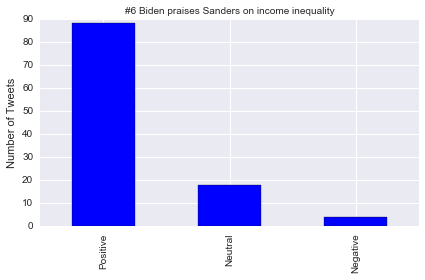

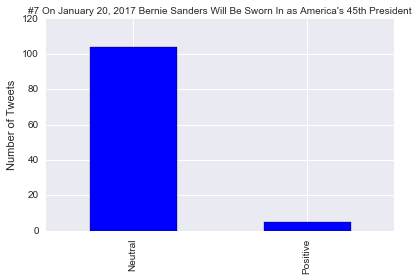

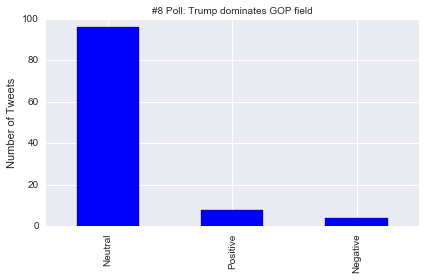

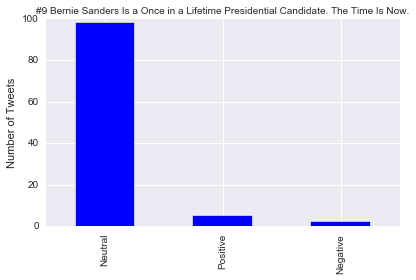

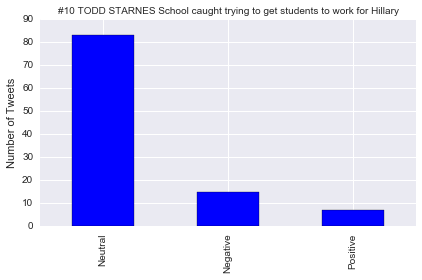

In [89]:
for t in top10:
    df[df.title==t].sentiment.value_counts().plot(kind='bar')
    plt.title("#" + str(top10.index(t) + 1) + " " + t.decode('utf8','ignore'), fontsize=10)
    plt.ylabel("Number of Tweets")
    plt.tight_layout()
    plt.savefig('FIGS/SUBSET/TOP10STORIES/' + str(top10.index(t) + 1) + '.png')
    plt.show()
    

In [22]:
CLINTON = '10000'
KASICH = '01000'
SANDERS = '00010'
TRUMP = '00100'
CRUZ = '00001'
CANDIDS = [CLINTON, TRUMP, SANDERS, CRUZ, KASICH]

In [21]:
# more sanity checks I keep losing some datums and gaining some
print len(df[df.candidates == CLINTON]) #6432
print len(df[df.candidates == TRUMP]) #8815
print len(df[df.candidates == SANDERS]) #4725
print len(df[df.candidates == CRUZ]) # 3441
print len(df[df.candidates == KASICH]) #1048

6432
8812
4725
3440
1048


## Publication Breakdown

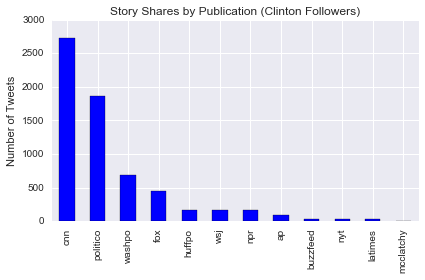

In [35]:
df[df.candidates == CLINTON].org.value_counts().plot(kind='bar')
plt.title('Story Shares by Publication (Clinton Followers)')
plt.ylabel('Number of Tweets')
plt.tight_layout()
plt.savefig('FIGS/SUBSET/clinton_camp_pubs.png')

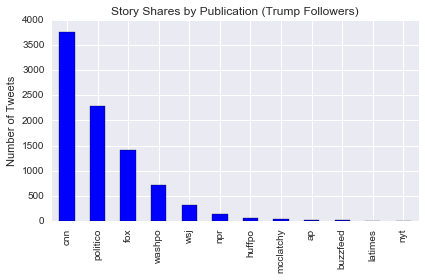

In [36]:
df[df.candidates == TRUMP].org.value_counts().plot(kind='bar')
plt.title('Story Shares by Publication (Trump Followers)')
plt.ylabel('Number of Tweets')
plt.tight_layout()
plt.savefig('FIGS/SUBSET/trump_camp_pubs.png')

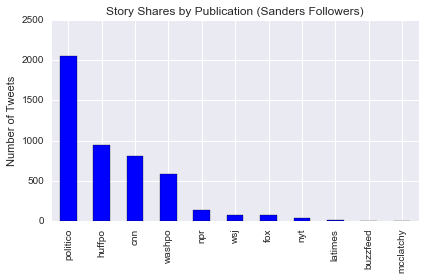

In [37]:
df[df.candidates == SANDERS].org.value_counts().plot(kind='bar')
plt.title('Story Shares by Publication (Sanders Followers)')
plt.ylabel('Number of Tweets')
plt.tight_layout()
plt.savefig('FIGS/SUBSET/sanders_camp_pubs.png')

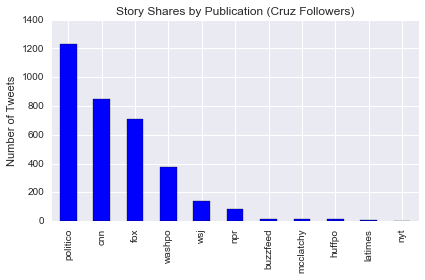

In [38]:
df[df.candidates == CRUZ].org.value_counts().plot(kind='bar')
plt.title('Story Shares by Publication (Cruz Followers)')
plt.ylabel('Number of Tweets')
plt.tight_layout()
plt.savefig('FIGS/SUBSET/cruz_camp_pubs.png')

## Followers of X Tweet Stories about Y

In [30]:
# let's make a new column by headline mention

## Sentiment of Tweets